In [1]:
import pandas as pd
import numpy as np
import time
from src.peblMl import *

In [2]:
%%time
data_start=pd.read_pickle('data/wikiNews.pkl')
data_train=data_start[:5000]
data_test=data_start[5000:5100]
#data_test=data_test[~data_test['topic'].isin(['other'])]
#data_train=data_train[~data_train['topic'].isin(['other'])]
print (len(data_test), len(data_train))

100 5000
Wall time: 129 ms


In [3]:
data_train.head()

,Noun,Text,category,topic,date_news
7376,мефодий год жизнь поэт член союз писатель росс...,владимир мефодьевич сегодня из пришло известие...,барнаул алтайский_край некрологи писатели росс...,"россия, некрологи",2005-02-01
1349,россия премьерминистр украина разъяснение вним...,россия заявлениями премьерминистра украины хоч...,россия украина политика вто юрий_ехануров поли...,"россия, украина, политика, европа",2005-11-01
1516,спортиспанияс человек гроссмейстер программа ч...,матч люди компьютеров спортиспанияс по ноября ...,фиде,other,2005-11-01
1520,ангел меркель германия германия женщина правит...,ангела меркель канцлер германии германия она п...,ангела_меркель христианско_демократический_сою...,политика,2005-11-01
1527,атака ноябрь страница атака домен машина гугл ...,атака гугл данным компании ноября предпринята ...,google швейцария европа интернет хакерские_ата...,европа,2005-11-01


In [4]:
%%time
VisResult=pd.DataFrame(columns=['factor', 'count new topic'])
for r in [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]:
    modelML=peblMl(factor=r)
    modelML.fit(data_train['Noun'].tolist(), data_train['category'].tolist())
    topicValueResult=pd.DataFrame(columns=['topicName', 'probValue'])
    for testRow in data_test['Noun'].tolist():
        result=modelML.predict(testRow, 'newTopic')[:1]
        topicValueResult=topicValueResult.append({'topicName': result.index[0], 'probValue': result.values[0]}, ignore_index=True)
    topicValueResultCount=topicValueResult[topicValueResult['topicName'].isin(['newTopic'])]
    VisResult=VisResult.append({'factor': modelML.factor, 'count new topic': len(topicValueResultCount)}, ignore_index=True)
    print (modelML.factor, len(topicValueResultCount))

0.9 100
0.8 100
0.7 100
0.6 97
0.5 95
0.4 91
0.3 88
0.2 75
0.1 24
0.05 7
0.01 0
Wall time: 22min 19s


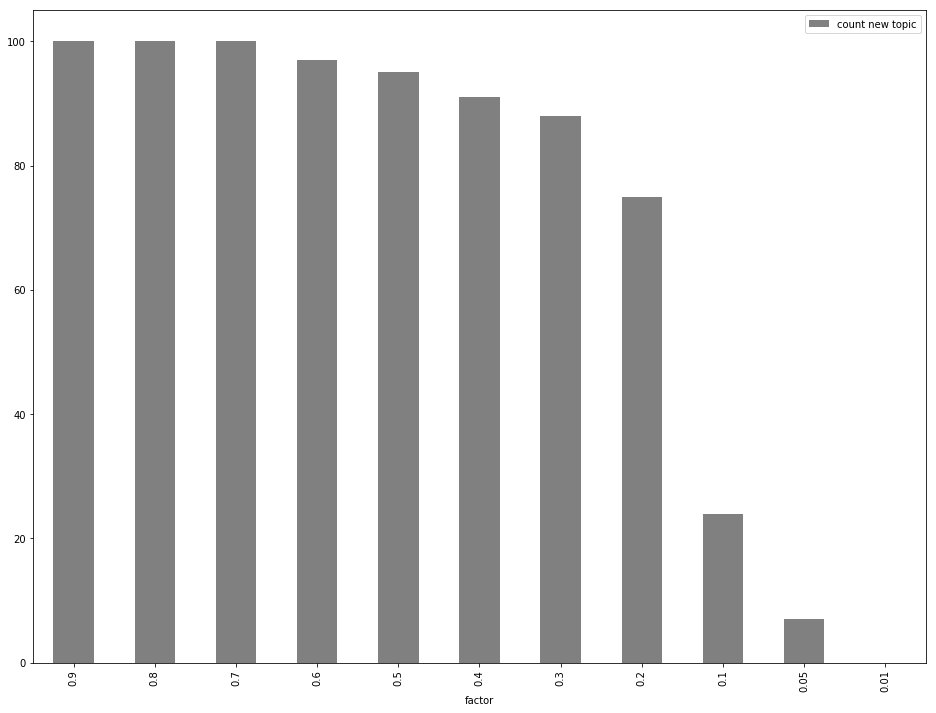

In [10]:
VisResult.plot.bar(x='factor', y='count new topic', figsize=(16, 12), color='grey')

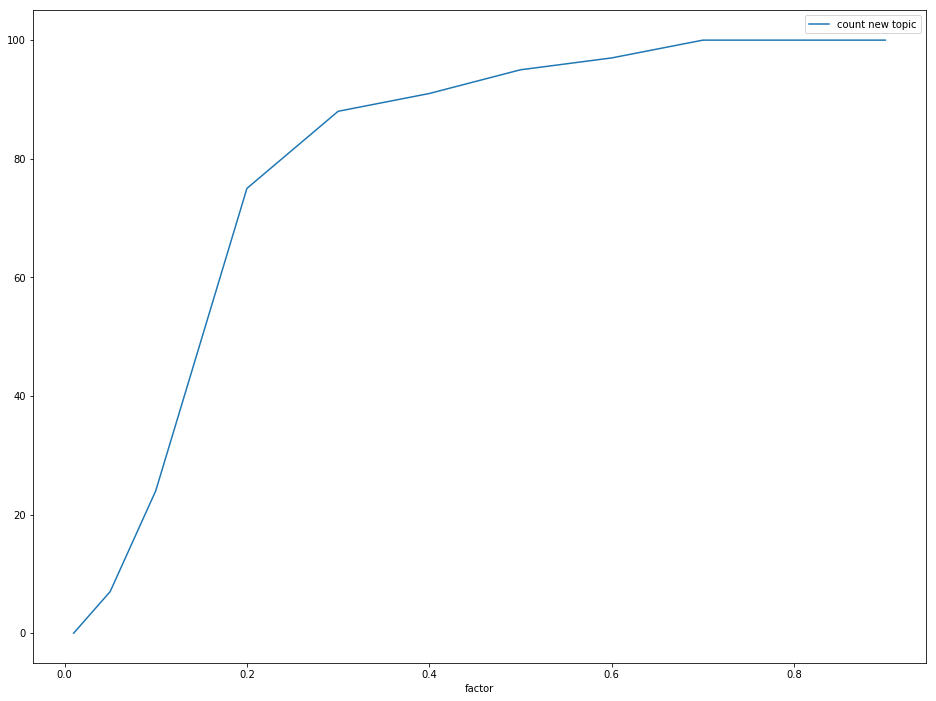

In [8]:
VisResult.plot(x='factor', y='count new topic', figsize=(16, 12))